In [2]:
import numpy as np
import cv2
import pylab
import matplotlib.pyplot as plt 
from PIL import Image
from scipy.fft import dctn, idctn

In [3]:
#correlation coefficient
def Rx0(input_list):
    sum = 0
    for x in input_list:
        sum = sum + (x ** 2)
    
    return sum

def Rx1(input_list):
    sum = 0
    for x in range(len(input_list) - 1):
        sum = sum + input_list[x]*input_list[x+1]
    
    return sum


In [4]:
path='image1.jpg'
img_gray = cv2.imread('image1.jpg',cv2.IMREAD_GRAYSCALE)
img=Image.open('image1.jpg')
pixel_gray_image = img.convert('L')
image_array = np.array(pixel_gray_image)
array_size = 10
cv2.imwrite('original.jpg',img_gray)
# dct
block = np.array(image_array[ 0 , array_size])
dct_image = dctn(image_array, type=2, norm='ortho')
line_data = [dct_image[i+2][i] for i in range(array_size)]
# 讀值
pixels = list(pixel_gray_image.getdata()) 
img_gray.shape


(500, 500)

In [5]:
x_range = 500
y_range = 500

Rxx_x = []
for m in range(y_range):

    Rxx_tmp = []

    for count in range(x_range):

        tmp = []
        down = count-4
        up = count+5

        for n in range(down,up):
            if n >= 0 and n < x_range:
                tmp.append(img_gray[m,n])
                
        tmp_avg=tmp-np.mean(tmp)

        Rxx_tmp.append(Rx1(tmp_avg)/(Rx0(tmp_avg)-0.01))


    Rxx_x.append(Rxx_tmp)
correlate_x = np.array(Rxx_x)
correlate_x.shape
correlate_x
#plt.plot(correlate_x)

array([[-0.28139169, -0.15873852, -0.05392777, ...,  0.56612864,
         0.42301184, -0.05128205],
       [-0.07039016, -0.07175738, -0.11515357, ...,  0.56612864,
         0.42301184, -0.05128205],
       [-0.42313419, -0.11534763,  0.21015222, ...,  0.56612864,
         0.42301184, -0.05128205],
       ...,
       [-0.06949807, -0.19750836, -0.14599747, ...,  0.62950674,
         0.5527201 ,  0.42547204],
       [-0.10584958, -0.23008069, -0.1002004 , ...,  0.63827792,
         0.5813807 ,  0.43035339],
       [-0.07289294, -0.15243902, -0.10121811, ...,  0.6452984 ,
         0.58180897,  0.45284546]])

In [14]:
law_th=0.343
sum_along_axis=[]
# Read image
img_src = cv2.imread('image1.jpg',cv2.IMREAD_GRAYSCALE)
a=[1,2,5,5,5,10,7]
# Prepare the 5x5 shaped filter
kernel = np.array([[1, 1, 1, 2, 1, 1, 1], 
                   [1, 4, 1, 4, 1, 4, 1],
                   [1, 1, 8, 8, 8, 1, 1],                   
                   [1, 1, 1, 16, 1, 1, 1],                   
                   [1, 1, 8, 8, 8, 1, 1],
                   [1, 4, 1, 4, 1, 4, 1], 
                   [1, 1, 1, 2, 1, 1, 1]  
                   ])
kernel = kernel/sum(kernel)
#array = kernel.reshape(500,500, 7,7)
array2 = np.full((500,500,3 ,3 ), 1)
array2=array2.astype(float)
correlate_x=correlate_x.astype(float)
linear_filter_2 = cv2.boxFilter(img_src, -1, (1,1)) #linear filter
linear_filter = cv2.boxFilter(img_src, -1, (9,9)) #linear filter
blur = cv2.blur(img_src, (3,3))
for i in range(x_range):
    for j in range(x_range):
        if correlate_x[i][j]>0:
            array2[i][j]=(array2[i][j]*(correlate_x[i][j]-law_th))
            img_rst = cv2.filter2D(img_src,-1,array2[i][j])
        else:
            img_rst = cv2.filter2D(img_src,-1,linear_filter_2)
# Filter the source image
# Save result image
cv2.imwrite('lpf.jpg',blur)
cv2.imwrite('0.343.jpg',img_rst)
array2

array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        ...,

        [[ 0.22312864,  0.22312864,  0.22312864],
         [ 0.22312864,  0.22312864,  0.22312864],
         [ 0.22312864,  0.22312864,  0.22312864]],

        [[ 0.08001184,  0.08001184,  0.08001184],
         [ 0.08001184,  0.08001184,  0.08001184],
         [ 0.08001184,  0.08001184,  0.08001184]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]]],


       [[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,

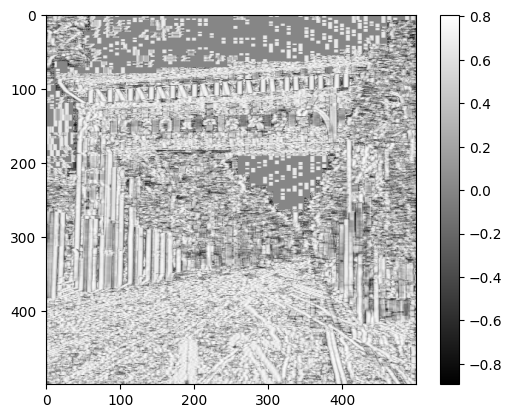

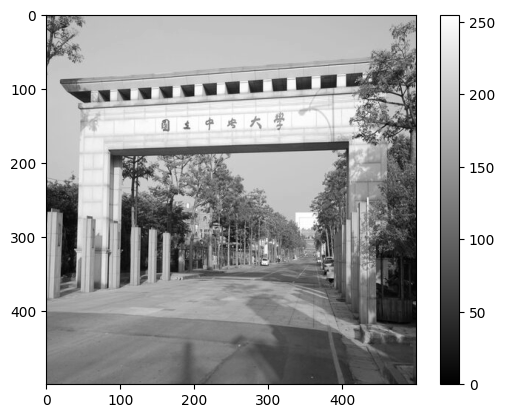

像素 1 的灰度值: 194
像素 1 的dct值: 770.099376743035
像素 2 的灰度值: 147
像素 2 的dct值: -1586.4806569584543
像素 3 的灰度值: 156
像素 3 的dct值: 2791.865242932552
像素 4 的灰度值: 163
像素 4 的dct值: -132.12476452042844
像素 5 的灰度值: 162
像素 5 的dct值: 581.0513070033319
像素 6 的灰度值: 112
像素 6 的dct值: 620.3205813542843
像素 7 的灰度值: 146
像素 7 的dct值: 678.0567108489694
像素 8 的灰度值: 153
像素 8 的dct值: 1346.2817272668271
像素 9 的灰度值: 42
像素 9 的dct值: 766.7832050807494
像素 10 的灰度值: 52
像素 10 的dct值: 958.5302287172578
<class 'numpy.ndarray'>
(500, 500)


C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27402 (\N{CJK UNIFIED IDEOGRAPH-6B0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 252

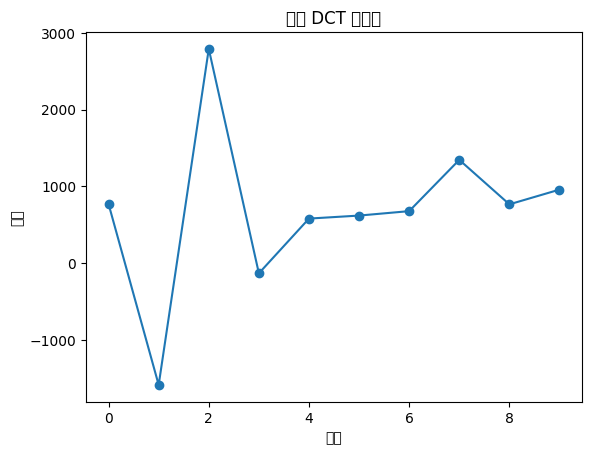

In [ ]:
plt.imshow(correlate_x, cmap='gray')
plt.colorbar()  
plt.show()
plt.imshow(image_array,cmap='gray')
plt.colorbar()  
plt.show()
#img_dct = Image.fromarray(line_data, 'L')  #將matix轉為圖片
#plt.imshow() #顯示圖片
# 输出前10个像素的灰度值
for i in range(10):
    print(f"像素 {i + 1} 的灰度值: {pixels[i]}")
    print(f"像素 {i + 1} 的dct值: {line_data[i]}")
    
# 顯示圖片格式
print(type(img_gray))  #顯示img在opencv中儲存的格式
print(img_gray.shape)
#print(img_gray)
#cv2.imshow('My Image', img_gray)
#cv2.imwrite('output.jpg', img_gray)

# 畫圖
plt.plot(line_data, marker='o', linestyle='-')
plt.title('二维 DCT 折線圖')
plt.xlabel('位置')
plt.ylabel('權重')
plt.show()



# 按下任意鍵則關閉所有視窗
cv2.namedWindow('My Image', cv2.WINDOW_NORMAL)
cv2.waitKey(0)
cv2.destroyAllWindows()